# 🍓 `compote` (Coefficients Of Multipoles of lensing POTEntials)

Author: Natalie B. Hogg

## Introduction

The `compote` package computes coefficients of the multipole expansion of a given lensing potential. This notebook demonstrates its use. Currently `compote` contains the singular isothermal ellipse (SIE) of [Kormann et al. 1993](https://articles.adsabs.harvard.edu/pdf/1994A%26A...284..285K), and the elliptical power law (EPL) of [Tessore and Metcalf 2015](https://arxiv.org/pdf/1507.01819.pdf). The singular isothermal sphere (SIS) can be obtained by setting the axis ratio $f$ of the SIE profile close to 1.

## Usage
First import the potential from `compote` whose multipoles you wish to compute:

In [1]:
from compote.potentials.epl import EPL

Before getting the multipole coefficients, you can calculate the value of the potential for a given value of the angular coordinate $\varphi$ (thanks to the separation of angular and radial coordinates in the definitions of both the SIE and EPL potentials, the result will simply scale with the choice of radial coordinate $\theta$):

In [2]:
epl_fixed_phi = EPL() # get an instance of the EPL class

Choose some values for the parameters:

In [3]:
phi = 0.5 # angular coordinate
theta = 1   # radial coordinate; result will simply scale with this

f = 7/8     # axis ratio of ellipse
theta_E = 1 # Einstein radius
gamma = 2   # slope of the power law

And get the value of the potential:

In [4]:
potential = epl_fixed_phi.potential(phi, theta, f, theta_E, gamma)

print(potential)

(1.0109740712415611+0j)


## Calculation

To calculate the multipole coefficients of a potential, import and initialise the Calculate class:

In [5]:
from compote.calculate.calculate import Calculate

calc = Calculate()

Make a new instance of the potential's class:

In [6]:
epl = EPL()

Choose some values for the parameters:

In [7]:
theta = 1  
f = 5/7     
theta_E = 1.2
gamma = 2.3

Choose the number of orders to compute (only even orders can be obtained via e.g. `orders = range(0, 12, 2)`):

In [8]:
orders = range(0, 12)

And get the result:

In [9]:
c_epl, error_epl = calc.coefficients(epl.potential, orders, theta, f, theta_E, gamma)

/home/nataliehogg/anaconda3/lib/python3.11/site-packages/scipy/integrate/_quadpack_py.py:577: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagse(func,a,b,args,full_output,epsabs,epsrel,limit)


## Results

You can display the results as a dataframe...

In [10]:
dataframe = calc.results_dataframe(c_epl, error_epl, orders)

print(dataframe)

             c_n         error
0   1.799077e+00  1.997375e-14
1  -1.141020e-16  1.278846e-14
2   2.729541e-02  1.265306e-14
3  -3.020041e-17  1.247374e-14
4  -8.502607e-04  1.278536e-14
5  -2.903720e-16  1.243950e-14
6   5.470403e-05  2.759277e-13
7  -4.176245e-16  1.130864e-14
8  -4.653175e-06  2.183068e-09
9   2.643102e-16  1.215679e-14
10  4.604154e-07  1.257139e-14
11 -5.094038e-16  1.286358e-14


... or as a handy LaTeX table.

In [11]:
latex = calc.results_dataframe(c_epl, error_epl, orders, to_latex=True)

print(latex)

\begin{tabular}{rrr}
\toprule
Order & $c_n$ & Error \\
\midrule
0 & 1.80e+00 & 2.00e-14 \\
1 & -1.14e-16 & 1.28e-14 \\
2 & 2.73e-02 & 1.27e-14 \\
3 & -3.02e-17 & 1.25e-14 \\
4 & -8.50e-04 & 1.28e-14 \\
5 & -2.90e-16 & 1.24e-14 \\
6 & 5.47e-05 & 2.76e-13 \\
7 & -4.18e-16 & 1.13e-14 \\
8 & -4.65e-06 & 2.18e-09 \\
9 & 2.64e-16 & 1.22e-14 \\
10 & 4.60e-07 & 1.26e-14 \\
11 & -5.09e-16 & 1.29e-14 \\
\bottomrule
\end{tabular}



## Plots

And lastly, with the Plot class you can plot the coefficients you calculated:

In [12]:
from compote.plots.plots import Plot

plt = Plot()

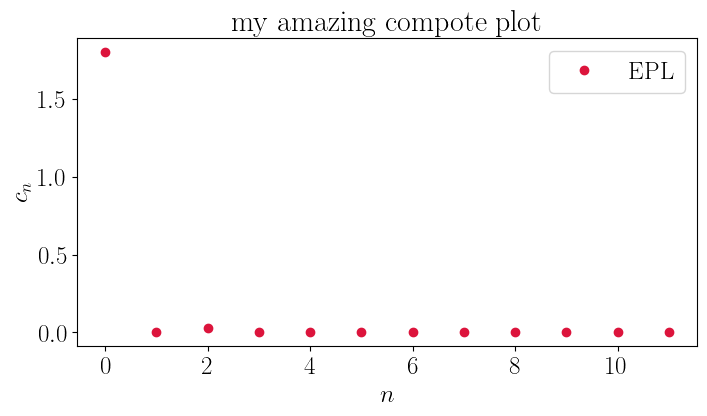

In [13]:
plot_kwargs = {'color': 'crimson', 'ls': ' ', 'marker': 'o', 'label': 'EPL'}

plt.coefficient_plot(c_epl, orders, plot_kwargs,  title='my amazing compote plot')